## Poetry Generation
 

***Data Source:***

https://www.kaggle.com/paultimothymooney/poetry?select=Kanye_West.txt


**Objective**


I will present different structure of models that are able to generating poems. 





##Import Libraries

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Levenshtein distance
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.1 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=e37b9fdcee997c295267c49fbee8e804fc3e8f74f580466c4666649a1afa9366
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
#Fuzzy matching
!pip install Fuzzy

  Created wheel for Fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=161714 sha256=3c16ea9440f5830e45271111a614f36805ade5e3946de39541358223620c34ca
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built Fuzzy


In [ ]:
#English ipa representation
!pip install eng-to-ipa 

     |████████████████████████████████| 2.8 MB 21.8 MB/s 
  Created wheel for eng-to-ipa: filename=eng_to_ipa-0.0.2-py3-none-any.whl size=2822641 sha256=d10b7cf3a27f401a52807b1549e3c2436ad00840649a1cbbbe9481cd3a5aa483
  Stored in directory: /root/.cache/pip/wheels/96/c0/dd/aeddfbebc2c3301c3dd09670d9954b0574ac4cd982664c1110
Successfully built eng-to-ipa


In [ ]:
#Readability index library
!pip install readability

  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35475 sha256=7adea34f73bfa4d723bc1d0bf308c113e48485ef5afcb7289a94d0f34f87631e
  Stored in directory: /root/.cache/pip/wheels/b9/8b/5a/ba40b81d8e91c7bc1d4226fa51d7b5943d147be122df515c19
Successfully built readability


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize,FreqDist
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))
from wordcloud import WordCloud
import random
import numpy as np
from numpy import array
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard
from keras.utils import np_utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import load_model  
import difflib
from nltk.corpus import wordnet as wn
from google.colab import files


In [ ]:
from Levenshtein import distance as lev
import readability 
import eng_to_ipa as p
import fuzzy
soundex = fuzzy.Soundex(6)

In [ ]:
def get_readability_index(text):
  ''' We give this function the text and it returns a dataframe of different readability metrics '''
  results = readability.getmeasures(text, lang='en')
  #ARI index
  ari = results['readability grades']['ARI']
  #FleschReadingEase
  FleschReadingEase = results['readability grades']['FleschReadingEase'] 
  #Kincaid
  Kincaid = results['readability grades']['Kincaid']                 
  dict= {'Metrics':['ARI', 'Flesch Reading Ease', 'Kincaid'], 'Results':[ari, FleschReadingEase, Kincaid] }
  return pd.DataFrame.from_dict(dict)

##Import Data
Import data from Kaggel to colab

In [ ]:
! pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishrakelmokhtar","key":"0da14fd7957867b90fafcb3305b33f4c"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#check if everything's okay by running this command.
! kaggle datasets list

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                   Wine Quality Dataset                               21KB  2022-01-15 19:15:11           6818  
prasertk/netflix-subscription-price-in-different-countries     Netflix subscription fee in different countries     3KB  2022-01-15 07:06:09           5179  
prasertk/the-best-cities-for-a-workation                       The Best Cities for a Workation                     6KB  2022-02-16 11:46:28            571  
majyhain/height-of-male-and-female-by-country-2022             Height of Male and Female by Country 2022           4KB  2022-02-02 00:40:19           2486  
sanjeetsinghnaik/top-1000-highest-grossing-movies         

In [ ]:
! kaggle datasets download -d paultimothymooney/poetry

  0% 0.00/2.00M [00:00<?, ?B/s]
100% 2.00M/2.00M [00:00<00:00, 46.6MB/s]


In [ ]:
#Create a directory named poetry,
! mkdir poetry

In [ ]:
#unzip poetry.zip data there,
! unzip poetry.zip -d poetry

Archive:  poetry.zip
  inflating: poetry/Kanye_West.txt   
  inflating: poetry/Lil_Wayne.txt    
  inflating: poetry/adele.txt        
  inflating: poetry/al-green.txt     
  inflating: poetry/alicia-keys.txt  
  inflating: poetry/amy-winehouse.txt  
  inflating: poetry/beatles.txt      
  inflating: poetry/bieber.txt       
  inflating: poetry/bjork.txt        
  inflating: poetry/blink-182.txt    
  inflating: poetry/bob-dylan.txt    
  inflating: poetry/bob-marley.txt   
  inflating: poetry/britney-spears.txt  
  inflating: poetry/bruce-springsteen.txt  
  inflating: poetry/bruno-mars.txt   
  inflating: poetry/cake.txt         
  inflating: poetry/dickinson.txt    
  inflating: poetry/disney.txt       
  inflating: poetry/dj-khaled.txt    
  inflating: poetry/dolly-parton.txt  
  inflating: poetry/dr-seuss.txt     
  inflating: poetry/drake.txt        
  inflating: poetry/eminem.txt       
  inflating: poetry/janisjoplin.txt  
  inflating: poetry/jimi-hendrix.txt  
  inflating: poe

In [ ]:
#I start by Kayne west'lyrics 
K_W_path= '/content/poetry/Kanye_West.txt'
adel_path = '/content/poetry/adele.txt'

##Expolatory Data Analysis

In [ ]:
#the first 1000 characters from the collection of poems by kanye_West
with open(K_W_path) as f: 
    print (f.read(1000))

﻿Eighteen years eighteen years
She got one of your kids got you for eighteen years
I know somebody paying child support for one of his kids
His baby mama car and crib is bigger than his
You will see him on TV any given Sunday
Win the Super Bowl and drive off in a Hyundai
She was supposed to buy your shorty Tyco with your money
She went to the doctor got lipo with your money
She walking around looking like Michael with your money
Shouldve got that insured Geico for your money
If you aint no punk
Holla We want prenup We want prenup Yeah
Its something that you need to have
Cause when she leave your ass she gon leave with half
Eighteen years eighteen years
And on the the birthday he found out it wasnt his
Now I aint saying you a gold digger you got needs
You dont want a dude to smoke but he cant buy weed
You go out to eat and he cant pay yall cant leave
Theres dishes in the back he gotta roll up your sleeves
But while yall washin watch him
He gone make it into a Benz out of that Datsun
He 

In [ ]:

with open(adel_path) as f:
    print(f.read(1000))

Looking for some education
Made my way into the night
All that bullshit conversation
Baby, can't you read the signs? I won't bore you with the details, baby
I don't even wanna waste your time
Let's just say that maybe
You could help me ease my mind
I ain't Mr. Right But if you're looking for fast love
If that's love in your eyes
It's more than enough
Had some bad love
So fast love is all that I've got on my mind Ooh, ooh
Ooh, ooh Looking for some affirmation
Made my way into the sun
My friends got their ladies
And they're all having babies
I just wanna have some fun I won't bore you with the details, baby
I don't even wanna waste your time
Let's just say that maybe
You could help me ease my mind
I ain't Mr. Right But if you're looking for fast love
If that's love in your eyes
It's more than enough
I've had some bad love
So fast love is all that I've got on my mind Ooh, ooh
Baby, baby
Ooh, ooh
Baby, baby
Ooh, ooh
Baby, baby
Ooh In the absence of security
I made my way into the night
Stu

In [ ]:
with open(adel_path) as f:
    l = f.read(100)
get_readability_index(l)

,Metrics,Results
0,ARI,2.276667
1,Flesch Reading Ease,84.767500
2,Kincaid,2.553889


==> Readability of an original text -Lyrics- of Adel songs have a very bad readability indexes. 

The objective is to have a text as readable as the original text or even better.

In [ ]:
def open_poetry(path):
  f = open(path,'r')
  poetry=''.join([l for l in f])
  #full text
  f = open(path,'r')
  text=''.join([l.lower() for l in f])
  #put the text into tokens
  tokens = nltk.word_tokenize(text)
  tokens_1 = nltk.word_tokenize(poetry)
  #eliminate the stop words
  tokens = [w for w in tokens if w not in stopwords]
  tokens_1 = [w for w in tokens_1 if w not in stopwords]
  return  poetry, text, tokens, tokens_1


In [ ]:
poetry, text, tokens, tokens_1 = open_poetry(K_W_path)

In [ ]:
def wordcloud(text): 
  '''Create and generate a word cloud image'''
  wordcloud = WordCloud().generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

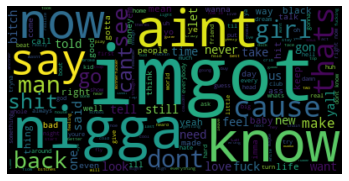

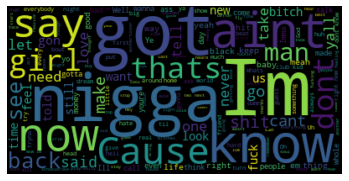

In [ ]:
wordcloud(text)  
wordcloud(poetry) 

==> As we can see here the most frequent words are: got, nigga,im, know, aint. Let's say the typical keyne west vocabluary.

==> Treating a poetry text in lowercase differ from treating it in normal format, as the word with which the singer start the paroles plays a big role.

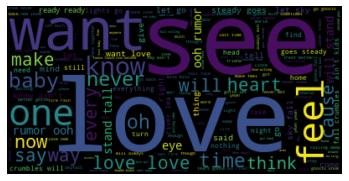

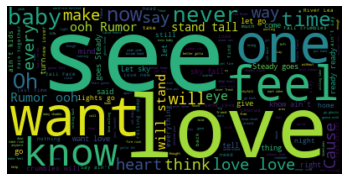

In [ ]:
poetry, text, tokens, tokens_1 = open_poetry(adel_path)
wordcloud(text)  
wordcloud(poetry) 

===> Adel songs contain see, want, love..

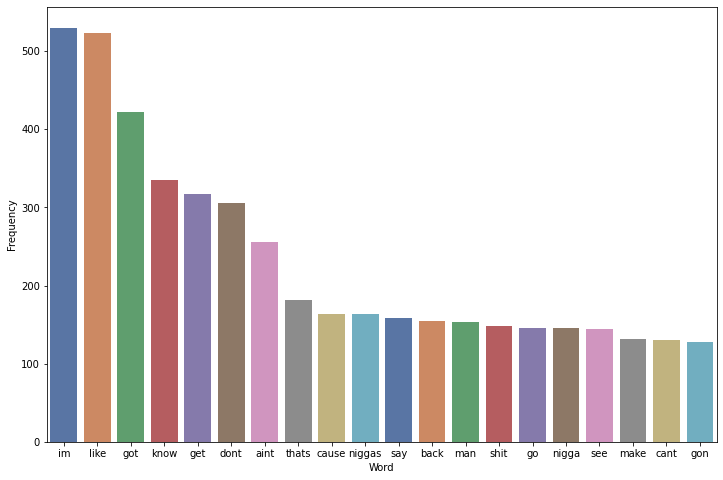

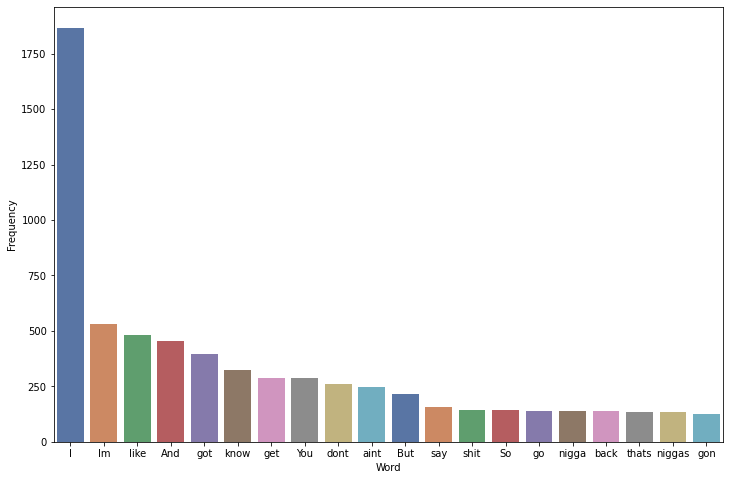

In [ ]:
 #Here we are going to investigate the most frequent words in songer lyrics 
def frequency_tokens(tokens): 
  ''' Given the tokens and it visulize the histogram of frequency'''
 
  frequency = FreqDist(tokens)
  dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
  dfFrequency = dfFrequency.nlargest(columns = "Frequency", n =20)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
  plt.show()
frequency_tokens(tokens)
frequency_tokens(tokens_1)

In [ ]:
# We try to visualize the lyrics songs with more clean data
stopwords+=['im','like','got','get','aint','thats','say','cant','gon','see','go']
tokens_2 =[w for w in tokens if w not in stopwords]

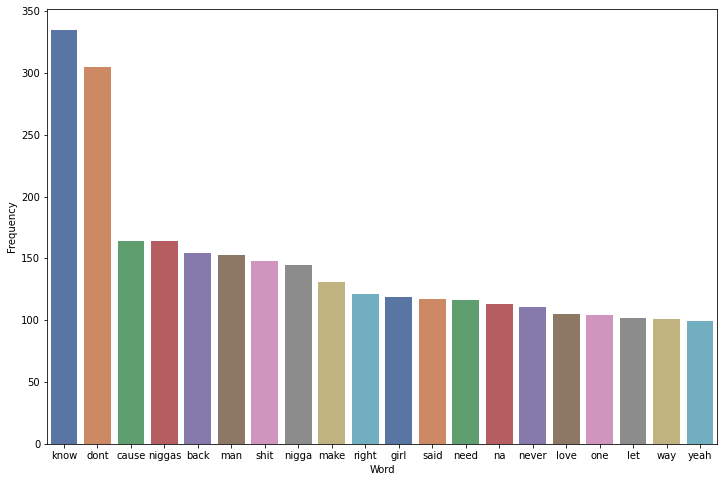

In [ ]:
frequency_tokens(tokens_2)

Stopwords are important in text generation so I'm not going to eliminate it, I'm just exploring the data and the most frequent words other than stopwords.

# Markov chain for text generation 





In [ ]:
def open_file(path):  
  '''Ginven the path, it construct the corpus and a the poetry text'''
  f = open(path,'r')
  poetry=''.join([l for l in f])
  #split the text file into single words. I'm keeping all the punctuation in, so my simulated text has punctuation:
  corpus = poetry.split()
  return poetry, corpus

In [ ]:
poetry, corpus= open_file(adel_path) 

In [ ]:
def make_pairs(corpus):
  '''I define a function to give us all the pairs of words in the speeches. 
     I'm using lazy evaluation, and yielding a generator object instead of actually filling up our memory with every pair of words'''
  for i in range(len(corpus)-1):
        yield (corpus[i], corpus[i+1]) # Yield can produce a sequence of values. We should use yield when we want to iterate over a sequence, 
                                        #but don’t want to store the entire sequence in memory.
        
make_pairs(corpus) 

<generator object make_pairs at 0x7fb758549850>

In [ ]:
word_dict = {}
#If the first word of the pair is already a key in the dictionary, simply append the next word to the list of words that follow that word. 
#Otherwise, initialize a new entry in the dictionary with the key equal to the first word
corpus = poetry.split()
pairs = make_pairs(corpus)

for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2] 

In [ ]:
def first_word(corpus):
  #pick some random word to kick off the chain
  first_word = np.random.choice(corpus)
  #I require the first word to be capitalized, so the text doesn’t begin mid-sentence
  while first_word.islower():
      first_word = np.random.choice(corpus)
  return first_word

In [ ]:
first_word=  first_word(corpus) 
chain = [first_word]
#number of words we want to simulate
n_words = 100
#After the first word, every word in the chain is sampled randomly from the list of words which have followed that word in the actual speeches
for i in range(n_words): 
    chain.append(np.random.choice(word_dict[chain[-1]]))

To generate a simulation based on a certain text, count up every word that is used. Then, for every word, store the words that are used next. This is the distribution of words in that text conditional on the preceding word.

In [ ]:
#return the chain as a string
' '.join(chain)

"Hitting me out your blessings to a web in your remedy, oh baby Oh I meant to life is done And I don't get away I play You set fire to your heart) Trust me crazy, But that walk And every piece of the only one that home I wish you You know I'm between us I will always feel Something that look back in your heart and thank you, you Should I wouldn't do I couldn't keep me Of my friends got Though I wish you have had planned But some fun again Try to stay I give up to"

##### We define the code in fonction blocks after detailing it in the above sells

In [ ]:
def open_file(path):  
  '''A function that ginving the path construct a corpus and a the poetry text'''
  f = open(path,'r')
  poetry=''.join([l for l in f])
  #split the text file into single words. I'm keeping all the punctuation in, so my simulated text has punctuation:
  corpus = poetry.split()
  return poetry, corpus
poetry, corpus= open_file(adel_path)
def make_pairs(corpus):
    for i in range(len(corpus)-1):
        yield (corpus[i], corpus[i+1])

def Markov(poetry,corpus,n_words = 10):
  word_dict = {}
  corpus = poetry.split()
  pairs = make_pairs(corpus)
  for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]

  first_word = np.random.choice(corpus)
  while first_word.islower():
    first_word = np.random.choice(corpus)
  chain = [first_word]
  for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

  ch=' '.join(chain)  
  return ch

Markov_text = Markov(poetry,corpus,n_words = 100)
Markov(poetry,corpus,n_words = 100)

"Whenever you loved me you longer my dreams come out and downs, you Everybody taking different I'll race, If you're just like to your soul, you've left you swear that we argue I know I miss you love No one for you don't you made up your mind I will do Go to respect you sad of me It's been for what you love in the beat (Tears are gonna fall, when I've forgiven it all with you don't come true But we start to me I'm sorry For the cracks in fact it's already defeated Ah-yeah-yeah-yeah-yeah-yeah-yeah everything that they were"

In [ ]:
get_readability_index(Markov_text)

,Metrics,Results
0,ARI,47.577429
1,Flesch Reading Ease,26.134286
2,Kincaid,35.699048


==> Readability using Markov chain has improved from the original text. But we can already see that there isn't any rythm in the lyrics.

# Recurrent Neural Networks: LSTM: character based model


In [ ]:
def open_file(path):
  '''Open the file that contains the poetry'''
  raw_text = open(path, 'r', encoding='utf-8').read()
  raw_text = raw_text.lower()
  return raw_text

In [ ]:
raw_text = open_file("/content/poetry/adele.txt")

In [ ]:
#print(raw_text)

We must prepare the data for modeling by the neural network. We cannot model the characters directly, instead we must convert the characters to integers.

We do this easily by first creating a set of all of the distinct characters in the txt file, then creating a map of each character to a unique integer.

In [ ]:
def mapping(raw_text): 
  '''create mapping of unique chars to integers, and a reverse mapping'''
  chars = sorted(list(set(raw_text)))
  char_to_int = dict((c, i) for i, c in enumerate(chars))
  int_to_char = dict((i, c) for i, c in enumerate(chars))
  return  chars, char_to_int, int_to_char

In [ ]:
chars, char_to_int, int_to_char = mapping(raw_text)

In [ ]:
def summurize(chars,raw_text):
  ''' summarize the loaded data'''
  n_chars = len(raw_text) 
  n_vocab = len(chars) 
  return n_chars, n_vocab 

n_chars, n_vocab = summurize(chars ,raw_text) 
print ("Total Characters: ", n_chars) 
print ("Total Vocab: ", n_vocab) 

Total Characters:  91330
Total Vocab:  45


We now need to define the training data for the network. There is a lot of flexibility in how you choose to break up the text and expose it to the network during training.

In our case, we will split the lyrics text up into subsequences with a fixed length of 100 characters, an arbitrary length (As 100 caracters may correpnds to a sentence of 20 words) , a personal choice.

In [ ]:
seq_length = 100
def data_prepare(n_chars ,char_to_int  ,seq_length = seq_length):	
	'''prepare the dataset of input to output pairs encoded as integers'''
	''' giving this function the length of the sequence we want the model to use in order to model the data'''
	''' to prepare the input data we give this function the two mapping dicts '''
	
	dataX = []
	dataY = [] 

	for i in range(0, n_chars - seq_length, 1):
		seq_in = raw_text[i:i + seq_length] #we select 100 chars 
		seq_out = raw_text[i + seq_length] # we select the next 100 chars
		dataX.append([char_to_int[char] for char in seq_in]) #transform the input 100 lengeth sequence into intergers
		dataY.append(char_to_int[seq_out]) # transform the expected output seq into integers 
  
	return dataX, dataY

dataX, dataY = data_prepare(n_chars,char_to_int ,seq_length = 100)
n_patterns = len(dataX)       
print ("Total Patterns: ", n_patterns) # We got 91330-100=91230 patterns       

Total Patterns:  91230


Each training pattern of the network is comprised of 100 time steps of one character (X) followed by one character output (y). When creating these sequences, we slide this window along the whole lyrics one character at a time, allowing each character a chance to be learned from the 100 characters that preceded it.

Now that we have prepared our training data we need to transform it so that it is suitable for use with Keras.

First we must transform the list of input sequences into the form [samples, time steps, features] expected by an LSTM network.

Next we need to rescale the integers to the range 0-to-1 to make the patterns easier to learn by the LSTM network that uses the sigmoid activation function by default.

Finally, we need to convert the output patterns (single characters converted to integers) into a one hot encoding. This is so that we can configure the network to predict the probability of each of the 45 different characters in the vocabulary (an easier representation) rather than trying to force it to predict precisely the next character. Each y value is converted into a sparse vector with a length of 45, full of zeros except with a 1 in the column for the letter (integer) that the pattern represents.

In [ ]:
def data_modeling(dataX, dataY):
  '''prepare data for modeling'''
  # reshape X to be [samples, time steps, features]
  X = np.reshape(dataX, (n_patterns, seq_length, 1))
  # normalize to not have a linear corrolation between the characters
  X = X / float(n_vocab)
  # one hot encode the output variable
  y = np_utils.to_categorical(dataY)
  return X, y

X, y = data_modeling(dataX, dataY)

We can now define our LSTM model. Here we define a single hidden LSTM layer with 256 memory units. The network uses dropout with a probability of 20. The output layer is a Dense layer using the softmax activation function to output a probability prediction for each of the 45 characters between 0 and 1

In [ ]:
#Here I make a very simpleee modell in order to speed the training beacause each time 
#I use the notebook I find myself spending so much time running the model and because it's on colab I dont find the saved versions
# define the LSTM model
def LSTM_model(X,num_unit_1,dropout_rate):
  '''Define an LSTM model'''
  model = Sequential()
  model.add(LSTM(num_unit_1, input_shape=(X.shape[1], X.shape[2])))
  model.add(Dropout(dropout_rate))
  model.add(Dense(y.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
model = LSTM_model(X,256,0.2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 45)                11565     
                                                                 
Total params: 275,757
Trainable params: 275,757
Non-trainable params: 0
_________________________________________________________________


We will use model checkpointing to record all of the network weights to file.

In [ ]:
# define the callbacks including early stopping, where I choose 3 trials before stopping 
filepath="model.hdf5"

def call_backs():
  Early_Stopping=EarlyStopping(patience=3, monitor='loss')
  #checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [Early_Stopping]#,TensorBoard(log_dir='logs')]
  return callbacks_list

callbacks_list = call_backs()

In [ ]:
Result = model.fit(X, y, epochs= 40, batch_size=128, callbacks=callbacks_list)

Epoch 1/40
713/713 [==============================] - 458s 639ms/step - loss: 2.9189
Epoch 2/40
713/713 [==============================] - 457s 641ms/step - loss: 2.7138
Epoch 3/40
713/713 [==============================] - 475s 666ms/step - loss: 2.6447
Epoch 4/40
713/713 [==============================] - 464s 651ms/step - loss: 2.5842
Epoch 5/40
713/713 [==============================] - 462s 648ms/step - loss: 2.5113
Epoch 6/40
713/713 [==============================] - 447s 626ms/step - loss: 2.4256
Epoch 7/40
713/713 [==============================] - 447s 626ms/step - loss: 2.3185
Epoch 8/40
713/713 [==============================] - 446s 626ms/step - loss: 2.1988
Epoch 9/40
713/713 [==============================] - 449s 630ms/step - loss: 2.0774
Epoch 10/40
713/713 [==============================] - 444s 623ms/step - loss: 1.9706
Epoch 11/40
713/713 [==============================] - 451s 632ms/step - loss: 1.8712
Epoch 12/40
713/713 [==============================] - 448s 628

To make predictions, we first start off with a seed sequence as input, generate the next character then update the seed sequence to add the generated character on the end and trim off the first character. This process is repeated for as long as we want to predict new characters.

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
f= open("Adel_gen.txt","a+") # a file where to save the generated text
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
with open("/content/Adel_gen.txt", "w") as f:
  # generate characters
  for i in range(1000):
      x = numpy.reshape(pattern, (1, len(pattern), 1))
      x = x / float(n_vocab)
      prediction = model.predict(x, verbose=0)
      index = numpy.argmax(prediction)
      result = int_to_char[index]
      seq_in = [int_to_char[value] for value in pattern]
      sys.stdout.write(result)
      f.write(result)
      pattern.append(index)
      pattern = pattern[1:len(pattern)]
  
print ("\nDone.")

" eaming out your name,
your name i set fire to the rain,
and i threw us into the flames
well, it felt "
 something died
'cause i knew that that was the last time, the last time
so meae wh never weile bite that i mtet thep i c neitl you the she sorein th tae soone whin we were you woln toe tornds to toen your caee i'm sollt ane toene your haart
it d san i wall you t more to dy the dool
it t aornain and the wouls to then your coes
toen i can't devp bisine felt
ih it hadn't been for love
i never woulda canght the train tooe it hasde io was just tike,  mous bo my band
toayei bo ikst wou wiut feme lnve t an it madd io biam
it siml ao i m cuire mo by yhu dlold teenes  lous then iaven
t's fine to tot toyed ayh i well a ciuld v ao it madt io sore
lo toori
in'the eeek so yiu hndw th that s no burnave bed iove le i c sill you
the way you walk that walk
and i can hear by the way you talk that talk
and i can know by the way you treat your gorl
that i can give bo an tha shass so dy rho ou hras ooe

In [ ]:
generated_text_1 = '''" eaming out your name,
your name i set fire to the rain,
and i threw us into the flames
well, it felt "
 something died
'cause i knew that that was the last time, the last time
so meae wh never weile bite that i mtet thep i c neitl you the she sorein th tae soone whin we were you woln toe tornds to toen your caee i'm sollt ane toene your haart
it d san i wall you t more to dy the dool
it t aornain and the wouls to then your coes
toen i can't devp bisine felt
ih it hadn't been for love
i never woulda canght the train tooe it hasde io was just tike,  mous bo my band
toayei bo ikst wou wiut feme lnve t an it madd io biam
it siml ao i m cuire mo by yhu dlold teenes  lous then iaven
t's fine to tot toyed ayh i well a ciuld v ao it madt io sore
lo toori
in'the eeek so yiu hndw th that s no burnave bed iove le i c sill you
the way you walk that walk
and i can hear by the way you talk that talk
and i can know by the way you treat your gorl
that i can give bo an tha shass so dy rho ou hras ooe toand whet ie soolt toad so heaiing me tha whine that wou'ane the torer oe thi so heap that you sein tu 
'''
get_readability_index(generated_text_1)

,Metrics,Results
0,ARI,0.046332
1,Flesch Reading Ease,111.844479
2,Kincaid,0.687723


==> The good thing that it is more readable than the original text. Yet, it still not very good as it has 0.04 ARI and 0.6 Kincaid index (extremly hard to read) 

# Combining LSTM char-based model and Markov chain model to get more accurate predictions

In [ ]:
corpus = poetry.split()

In [ ]:
def get_phonetics(list_of_words):
  phonetic_list = [fuzzy.nysiis(w) for w in list_of_words]
  return phonetic_list 


def get_phonetics_dict(word_dict):
  ''' word_dict: a dict that at each word corresponds the possible next words.
      returns word_ph: a dic that at each word corresponds the possible next phonetics'''
  word_ph ={} # Define the dict of phonetics 
  word_ph =word_ph.fromkeys([i for i in word_dict.keys()]) #initilize the keys as the word_dict
  for i in word_ph.keys():
    word_ph[i]=[]
    #use the fuzzy matching to generate the phonetic of each word 
    word_ph[i] = get_phonetics(word_dict[i])
  return word_ph

#Find the closest match word 
def find_the_word(generated_word):
  '''In fact, in the vocabluary of each singer we find some words that arn't very well written, we look for their roots by looking in the possible rythming words and selecting the closest match'''
  List_of_rythming_word = p.get_rhymes(generated_word) #return a list of same rythming words 
  possible_word = difflib.get_close_matches(generated_word, List_of_rythming_word,n=1)[0]
  if possible_word==[]:
    return generated_word
  else:
    return possible_word[0]  


#Finf similar meaning words
def get_synonyms(word):
  synonyms = []

  for syn in wn.synsets(word):
      for i in syn.lemmas():
          synonyms.append(i.name())
  return synonyms


def make_directory(poetry):  
  word_dict = {}
  corpus = poetry.split()
  pairs = make_pairs(corpus)
  for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2] 
  return word_dict


def word_in_corpus(word,corpus):
  b = False
  if word in corpus:
    b = True 
  return b 

def unique_vocab(vocab):
  ''' Unique words in a vocab'''
  words = [word.strip('.,!;()[]') for word in vocab] 
  #finding unique words in a vocab
  unique = []
  for word in words:
      if word not in unique:
          unique.append(word)
  return unique 


In [ ]:
word_dict = make_directory(poetry)

In [ ]:
generated_text_word = generated_text_1.split()

In [ ]:
generated_text_vocab = unique_vocab(generated_text_word)

In [ ]:
singers_vocab = unique_vocab(corpus) 

In [ ]:
first_word_generated_text = generated_text_word[0]
if first_word_generated_text not in singers_vocab:
  generated_text_word[0] = first_word(corpus)


In [ ]:
for w in generated_text_word[1:]:
  if w not in singers_vocab:
    word_ph = fuzzy.nysiis(w)
    word_predecessor_index = generated_text_word.index(w)-1
    word_predecessor = generated_text_word[word_predecessor_index]
    list_of_ph = get_phonetics(word_dict[word_predecessor])
    list_leveshtein_distance = [lev(word_ph,i) for i in list_of_ph]
    index_of_most_similar_word = np.argmin(list_leveshtein_distance)
    word_of_interst = word_dict[word_predecessor][index_of_most_similar_word]
    if index_of_most_similar_word>4 :
      
      #Markov chain, we select randomly a word 
      markov_word = np.random.choice(word_dict[word_predecessor])
      #We see the synonyms of this word 
      list_of_syn =  get_synonyms(markov_word) 
      if len(list_of_syn)==0:
        best_original_word = find_the_word(markov_word) 
      list_of_syn =  get_synonyms(best_original_word)
      #We select the the synonym word with the closest rythm phonetic pronounciation
      list_ph_syn = get_phonetics(list_of_syn)
      #print(list_ph_syn)
      #Calculate the levenstein distance 
      list_leveshtein_distance_of_syn = [lev(word_ph,i) for i in list_ph_syn]
      #print(list_leveshtein_distance_of_syn)
      #Select the phonetcally close word
      index_of_most_similar_word_of_syn = np.argmin(list_leveshtein_distance_of_syn)
      #define the word
      word_of_interst = list_of_syn[index_of_most_similar_word_of_syn]
    #Replace it in the generated text
    generated_text_word[generated_text_word.index(w)] = word_of_interst

In [ ]:
corrected_text = ' '.join([w for w in generated_text_word])

In [ ]:
get_readability_index(corrected_text)

,Metrics,Results
0,ARI,123.424615
1,Flesch Reading Ease,-128.324231
2,Kincaid,95.749231


==> ARI indicates that the text is 'meaningless'. while the kincaid indicats that the text is readable. Flesch Reading Ease is out of bounds.

In [ ]:
corrected_text 

'I out your time your name I set fire to the rain and I threw us into the flames Well, it felt " something died \'cause I knew that that was the last time, the last time so you Why never will At that I met Are the kiss to you the she said to the sun But we were you walk that talk to ten your knees If that\'s love When your hand it I can I will you to more to you the whole it to turning and the whole to then your eyes that I can\'t help believe felt a it hadn\'t been for love is never woulda caught the train to it hasn\'t gone was just takes me be my bed Turn my last time, the sun My oh an it hurts You can it seems so I miss my way by the Cause there\'s a then leave the fine to meet To go I well a child who I it hurts You shower me that it look so you heard the that I no tomorrow bed Turn all I miss my you the way you walk that walk and I can hear by the way you talk that talk and I can know by the way you treat your girl that I can give you an us I so shy? Ain\'t like he\'s the time Le

# RNN LSTM units: word based model

Unlike char-based model, here we are interested in treating the text on the word-level. We are going to keep the stopwords as usual but eliminate the punctuation.

In [ ]:
# Import the data
adel_path = "/content/poetry/adele.txt"

In [ ]:
def load_text(path):
  '''Loading the data from the source'''
  train = open(path, 'r')
  max_words = 50000 # Max size of the dictionary
  tokenizer = Tokenizer(num_words=max_words,  #convert text to sequences consistently
      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t',
      lower=True, split=' ', char_level=False)
  poetry=[l for l in train]
  tokenizer.fit_on_texts(poetry)
  sequences = tokenizer.texts_to_sequences(poetry)
  # Flatten the list of lists resulting from the tokenization. This will reduce the list
  # to one dimension, allowing us to apply the sliding window technique to predict the next word
  text = [item for sublist in sequences for item in sublist]
  vocab_size = len(tokenizer.word_index)
  return tokenizer,text, poetry,sequences,vocab_size


def LSTM_data(text):
  '''Data preprocessing '''
  # Training on 6 words to predict the 7th
  sentence_len = 6
  pred_len = 1
  train_len = sentence_len - pred_len
  seq = []
  # Sliding window to generate train data
  for i in range(len(text)-sentence_len):
      seq.append(text[i:i+sentence_len])
  # Reverse dictionary to decode tokenized sequences back to words
  reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

  # Each row in seq is a 7 word long window. We append he first 6 words as the input to predict the 7th word
  trainX = []
  trainy = []
  for i in seq:
      trainX.append(i[:train_len])
      trainy.append(i[-1])

  return trainX, trainy,train_len,reverse_word_map



def LSTM_Architecture(num_unit_1,num_unit_2,num_unit_3,num_unit_4,dropout_rate):
  '''Define the model architecture'''
  model= Sequential([
      Embedding(vocab_size+1, num_unit_1, input_length=train_len),
      LSTM(num_unit_2, return_sequences=True),
      LSTM(num_unit_3),
      Dense(num_unit_4, activation='relu'),
      Dropout(dropout_rate),
      Dense(vocab_size, activation='softmax')
  ])
  return model 




def compile_fit_model(model,num_epoch_, filepath_,optimizer_='adam',loss_='categorical_crossentropy'): 
  '''Compile and fit the model with checkpoints''' 
  model.compile(optimizer=optimizer_,
                loss=loss_,
                metrics=['accuracy'])
  # Early stopping allows model to stop training if improvement stops.
  es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
  # # Model checkpointing allows us to preserve progress during training if training is interrupted
  checkpoint = ModelCheckpoint(filepath_, monitor='loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint,es]
  history = model.fit(np.asarray(trainX),
            pd.get_dummies(np.asarray(trainy)),
            epochs = num_epoch_,
            batch_size = 128,
            callbacks = callbacks_list,
            verbose = 1)
  return history


def gen(model,seq,reverse_word_map,max_len = 50):
    ''' Generates a sequence given a string seq using specified model until the total sequence length
        reaches max_len'''
    # Tokenize the input string
    tokenized_sent = tokenizer.texts_to_sequences([seq])
    max_len = max_len + len(tokenized_sent[0])
    # If sentence is not as long as the desired sentence length, we need to 'pad sequence' so that
    # the array input shape is correct going into our LSTM. the `pad_sequences` function adds 
    # zeroes to the left side of our sequence until it becomes long enough, as the number of input features.
    while len(tokenized_sent[0]) < max_len:
        padded_sentence = pad_sequences(tokenized_sent[-max_len:],maxlen=max_len)
        op = model.predict(np.asarray(padded_sentence).reshape(1,-1))
        tokenized_sent[0].append(op.argmax()+1)
        
    return " ".join(map(lambda x : reverse_word_map[x],tokenized_sent[0]))


def test_models(test_string, model,reverse_word_map,sequence_length= 50):
    '''Generates output given input test_string up to sequence_length'''
    #print('Input String: ', test_string)
    prediction = gen(model,test_string,reverse_word_map,sequence_length)
    return prediction


In [ ]:
tokenizer,text, poetry,sequences,vocab_size= load_text(adel_path)

In [ ]:
print('Vocabulary size in this corpus: ', vocab_size)

Vocabulary size in this corpus:  1733


In [ ]:
trainX, trainy,train_len,reverse_word_map = LSTM_data(text)

In [ ]:
model_2 = LSTM_Architecture(50, 100 ,100, 100, 0.1)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 50)             86700     
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            60400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1733)              175033    
                                                                 
Total params: 412,633
Trainable params: 412,633
Non-tr

In [ ]:
 filepath_ = "./model_2_weights.hdf5"
 compile_fit_model(model_2,40, filepath_ ,optimizer_='adam',loss_='categorical_crossentropy')

Epoch 1/40
150/151 [============================>.] - ETA: 0s - loss: 6.2358 - accuracy: 0.0447
Epoch 1: loss improved from inf to 6.23604, saving model to ./model_2_weights.hdf5
151/151 [==============================] - 10s 38ms/step - loss: 6.2360 - accuracy: 0.0446
Epoch 2/40
150/151 [============================>.] - ETA: 0s - loss: 5.8552 - accuracy: 0.0473
Epoch 2: loss improved from 6.23604 to 5.85596, saving model to ./model_2_weights.hdf5
151/151 [==============================] - 6s 38ms/step - loss: 5.8560 - accuracy: 0.0474
Epoch 3/40
150/151 [============================>.] - ETA: 0s - loss: 5.8294 - accuracy: 0.0477
Epoch 3: loss improved from 5.85596 to 5.83108, saving model to ./model_2_weights.hdf5
151/151 [==============================] - 6s 38ms/step - loss: 5.8311 - accuracy: 0.0477
Epoch 4/40
150/151 [============================>.] - ETA: 0s - loss: 5.8086 - accuracy: 0.0471
Epoch 4: loss improved from 5.83108 to 5.80853, saving model to ./model_2_weights.hdf5
1

# Testing the generation models

With training complete, we now have a model that can generate text. However, we need to give it a starting point. To do this, we write a function that takes a string input from the testing file, tokenizes it, then pads it with zeroes so it fits into our 6 long prediction window.

In [ ]:
LSTM_word_based_text_1 = test_models('I was wondering if after all these',model_2,reverse_word_map,50)
LSTM_word_based_text_1

"i was wondering if after all these so so so so for so so for sell it so so so so so so so so so so so so so so yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah so so so so i'll so so i'll i'll \n i'll i'll i'll"

In [ ]:
get_readability_index(LSTM_word_based_text_1)

,Metrics,Results
0,ARI,6.376774
1,Flesch Reading Ease,94.863548
2,Kincaid,7.729032


In [ ]:
LSTM_word_based_text= test_models('Hello from the other side',model_2,reverse_word_map,5)
print(LSTM_word_based_text)

hello from the other side against the ups it
 the


In [ ]:
get_readability_index(LSTM_word_based_text)

,Metrics,Results
0,ARI,-0.561
1,Flesch Reading Ease,117.160
2,Kincaid,-1.840


# LSTM word-based model with RMSprop 

In [ ]:
 filepath_ = "./model_2_rm_weights.hdf5"
 compile_fit_model(model_2,40, filepath_ ,optimizer_='RMSprop',loss_='categorical_crossentropy')

Epoch 1/40
150/151 [============================>.] - ETA: 0s - loss: 1.4946 - accuracy: 0.6337
Epoch 1: loss improved from inf to 1.49458, saving model to ./model_2_rm_weights.hdf5
151/151 [==============================] - 10s 39ms/step - loss: 1.4946 - accuracy: 0.6337
Epoch 2/40
150/151 [============================>.] - ETA: 0s - loss: 1.4227 - accuracy: 0.6510
Epoch 2: loss improved from 1.49458 to 1.42293, saving model to ./model_2_rm_weights.hdf5
151/151 [==============================] - 6s 39ms/step - loss: 1.4229 - accuracy: 0.6510
Epoch 3/40
150/151 [============================>.] - ETA: 0s - loss: 1.3873 - accuracy: 0.6582
Epoch 3: loss improved from 1.42293 to 1.38617, saving model to ./model_2_rm_weights.hdf5
151/151 [==============================] - 6s 39ms/step - loss: 1.3862 - accuracy: 0.6586
Epoch 4/40
151/151 [==============================] - ETA: 0s - loss: 1.3592 - accuracy: 0.6668
Epoch 4: loss improved from 1.38617 to 1.35920, saving model to ./model_2_rm_we

In [ ]:
pred_2_rms = test_models('Hello from',model_2,reverse_word_map,50)
print(pred_2_rms) 

hello from with your ready in with with with with with with with with with with with with with with with with with with with with with with with with with with you 
 forgive me take your left my say don't say i say you'd told the light
 light
 
 don't


In [ ]:
get_readability_index(pred_2_rms)

,Metrics,Results
0,ARI,5.562
1,Flesch Reading Ease,83.320
2,Kincaid,2.880


# LSTM word based model with new architecture 

In [ ]:
trainX, trainy,train_len,reverse_word_map = LSTM_data(text)
model_3 = LSTM_Architecture(100, 200 ,100, 100, 0.5)
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 5, 100)            173400    
                                                                 
 lstm_20 (LSTM)              (None, 5, 200)            240800    
                                                                 
 lstm_21 (LSTM)              (None, 100)               120400    
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 1733)              175033    
                                                                 
Total params: 719,733
Trainable params: 719,733
Non-tr

In [ ]:
 filepath_ = "./model_3_weights.hdf5"
 compile_fit_model(model_3, 40, filepath_ ,optimizer_='adam',loss_='categorical_crossentropy')

Epoch 1/40
151/151 [==============================] - ETA: 0s - loss: 6.2579 - accuracy: 0.0424
Epoch 1: loss improved from inf to 6.25788, saving model to ./model_3_weights.hdf5
151/151 [==============================] - 18s 81ms/step - loss: 6.2579 - accuracy: 0.0424
Epoch 2/40
151/151 [==============================] - ETA: 0s - loss: 5.8903 - accuracy: 0.0448
Epoch 2: loss improved from 6.25788 to 5.89028, saving model to ./model_3_weights.hdf5
151/151 [==============================] - 10s 66ms/step - loss: 5.8903 - accuracy: 0.0448
Epoch 3/40
151/151 [==============================] - ETA: 0s - loss: 5.8126 - accuracy: 0.0473
Epoch 3: loss improved from 5.89028 to 5.81261, saving model to ./model_3_weights.hdf5
151/151 [==============================] - 10s 65ms/step - loss: 5.8126 - accuracy: 0.0473
Epoch 4/40
151/151 [==============================] - ETA: 0s - loss: 5.6660 - accuracy: 0.0443
Epoch 4: loss improved from 5.81261 to 5.66599, saving model to ./model_3_weights.hdf5

In [ ]:
pred_3 = test_models('Hello from the ',model_3,reverse_word_map,50)
print(pred_3)

hello from the bringing and a not hoping and a not not no a been 
 
 a not known
 to a not known
 me like a ever just a right just a right just waiting so a not hoping 
 a right 
 a not just a right but a not always


In [ ]:
get_readability_index(pred_3)

,Metrics,Results
0,ARI,1.410
1,Flesch Reading Ease,92.965
2,Kincaid,2.280


# LSTM word based model with deeper architecture

In [ ]:
def LSTM_Architecture_2(num_unit_1,num_unit_2,num_unit_3,num_unit_4,num_unit_5,dropout_rate):
  '''Define the model architecture'''
  model= Sequential([
      Embedding(vocab_size+1, num_unit_1, input_length=train_len),
      LSTM(num_unit_2, return_sequences=True),
      Dropout(dropout_rate),
      LSTM(num_unit_3),
      Dropout(dropout_rate),
      Dense(num_unit_5, activation='relu'),
      Dropout(dropout_rate),
      Dense(vocab_size, activation='softmax')
  ])
  return model

In [ ]:
model_4 = LSTM_Architecture_2(200,170,100,100,100,0.1)

In [ ]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 5, 200)            346800    
                                                                 
 lstm_22 (LSTM)              (None, 5, 170)            252280    
                                                                 
 dropout_18 (Dropout)        (None, 5, 170)            0         
                                                                 
 lstm_23 (LSTM)              (None, 100)               108400    
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_20 (Dropout)        (None, 100)             

In [ ]:
 filepath_ = "./model_4_weights.hdf5"
 compile_fit_model(model_4, 40, filepath_ ,optimizer_='adam',loss_='categorical_crossentropy')

Epoch 1/40
151/151 [==============================] - ETA: 0s - loss: 6.2285 - accuracy: 0.0417
Epoch 1: loss improved from inf to 6.22847, saving model to ./model_4_weights.hdf5
151/151 [==============================] - 14s 66ms/step - loss: 6.2285 - accuracy: 0.0417
Epoch 2/40
151/151 [==============================] - ETA: 0s - loss: 5.8554 - accuracy: 0.0442
Epoch 2: loss improved from 6.22847 to 5.85536, saving model to ./model_4_weights.hdf5
151/151 [==============================] - 10s 66ms/step - loss: 5.8554 - accuracy: 0.0442
Epoch 3/40
151/151 [==============================] - ETA: 0s - loss: 5.6998 - accuracy: 0.0459
Epoch 3: loss improved from 5.85536 to 5.69981, saving model to ./model_4_weights.hdf5
151/151 [==============================] - 10s 67ms/step - loss: 5.6998 - accuracy: 0.0459
Epoch 4/40
151/151 [==============================] - ETA: 0s - loss: 5.5456 - accuracy: 0.0485
Epoch 4: loss improved from 5.69981 to 5.54557, saving model to ./model_4_weights.hdf5

In [ ]:
pred_4 = test_models('Hello from',model_4,reverse_word_map,100)
print(pred_4)

hello from so so so so so so so so so so far far far so far so under and walk and blue
 there's up
 there's up
 yeah yeah yeah yeah yeah yeah yeah yeah yeah out yeah a fool
 just all there's there's there's yeah there's there's there's yeah yeah yeah steady yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah everything i'll see
 i'm changed yeah everything there's there's out there's free
 there's shades but many out there's us
 there's shades out out there's door there's


In [ ]:
get_readability_index(pred_4)

,Metrics,Results
0,ARI,2.280250
1,Flesch Reading Ease,109.830000
2,Kincaid,1.666667
